<a href="https://colab.research.google.com/github/basunepal/Basic-EDA-and-Data-Cleaning/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Description

This project involves conducting an exploratory data analysis (EDA) on the Titanic dataset, which includes passenger information and survival outcomes. We will analyze passenger demographics, identify survival patterns, handle missing data, and prepare the dataset for further analysis or modeling.

##Objective

- Analyzing passenger demographics and survival patterns.
- Handling missing data effectively.
- Standardizing features for consistent analysis.
- Creating new features to enhance insights.

##Data Science Tools

* Pandas: Data manipulation and cleaning
* Numpy: Handling missing values and numerical operations
* Seaborn & Matplotlib: Data visualization

#Dataset

Source: Titanic dataset, available on [Kaggle](https://www.kaggle.com/c/titanic).

## 1. Data Loading and Initial Exploration

Goal: Load the dataset and conduct a quick inspection to understand its structure.

Steps:
  * Import necessary libraries (pandas, numpy, matplotlib, seaborn).
  * Load the dataset from a CSV file.
  * Display the first few rows, check data types, null values, and basic statistics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Handling Missing Data

Goal: Identify and address missing values in Age, Cabin, and Embarked columns.

Steps:
  * Calculate the percentage of missing data for each column.
  * Impute missing values in Age with the median or by groups (e.g., by class or gender).
  * Drop the Cabin column or create a new feature (e.g., whether the cabin info is present).
  * Impute missing values in Embarked with the mode (most frequent value).
  * Visualize missing data patterns for better understanding.

In [5]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
missing_values = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage:\n", missing_values)

Missing Values Percentage:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


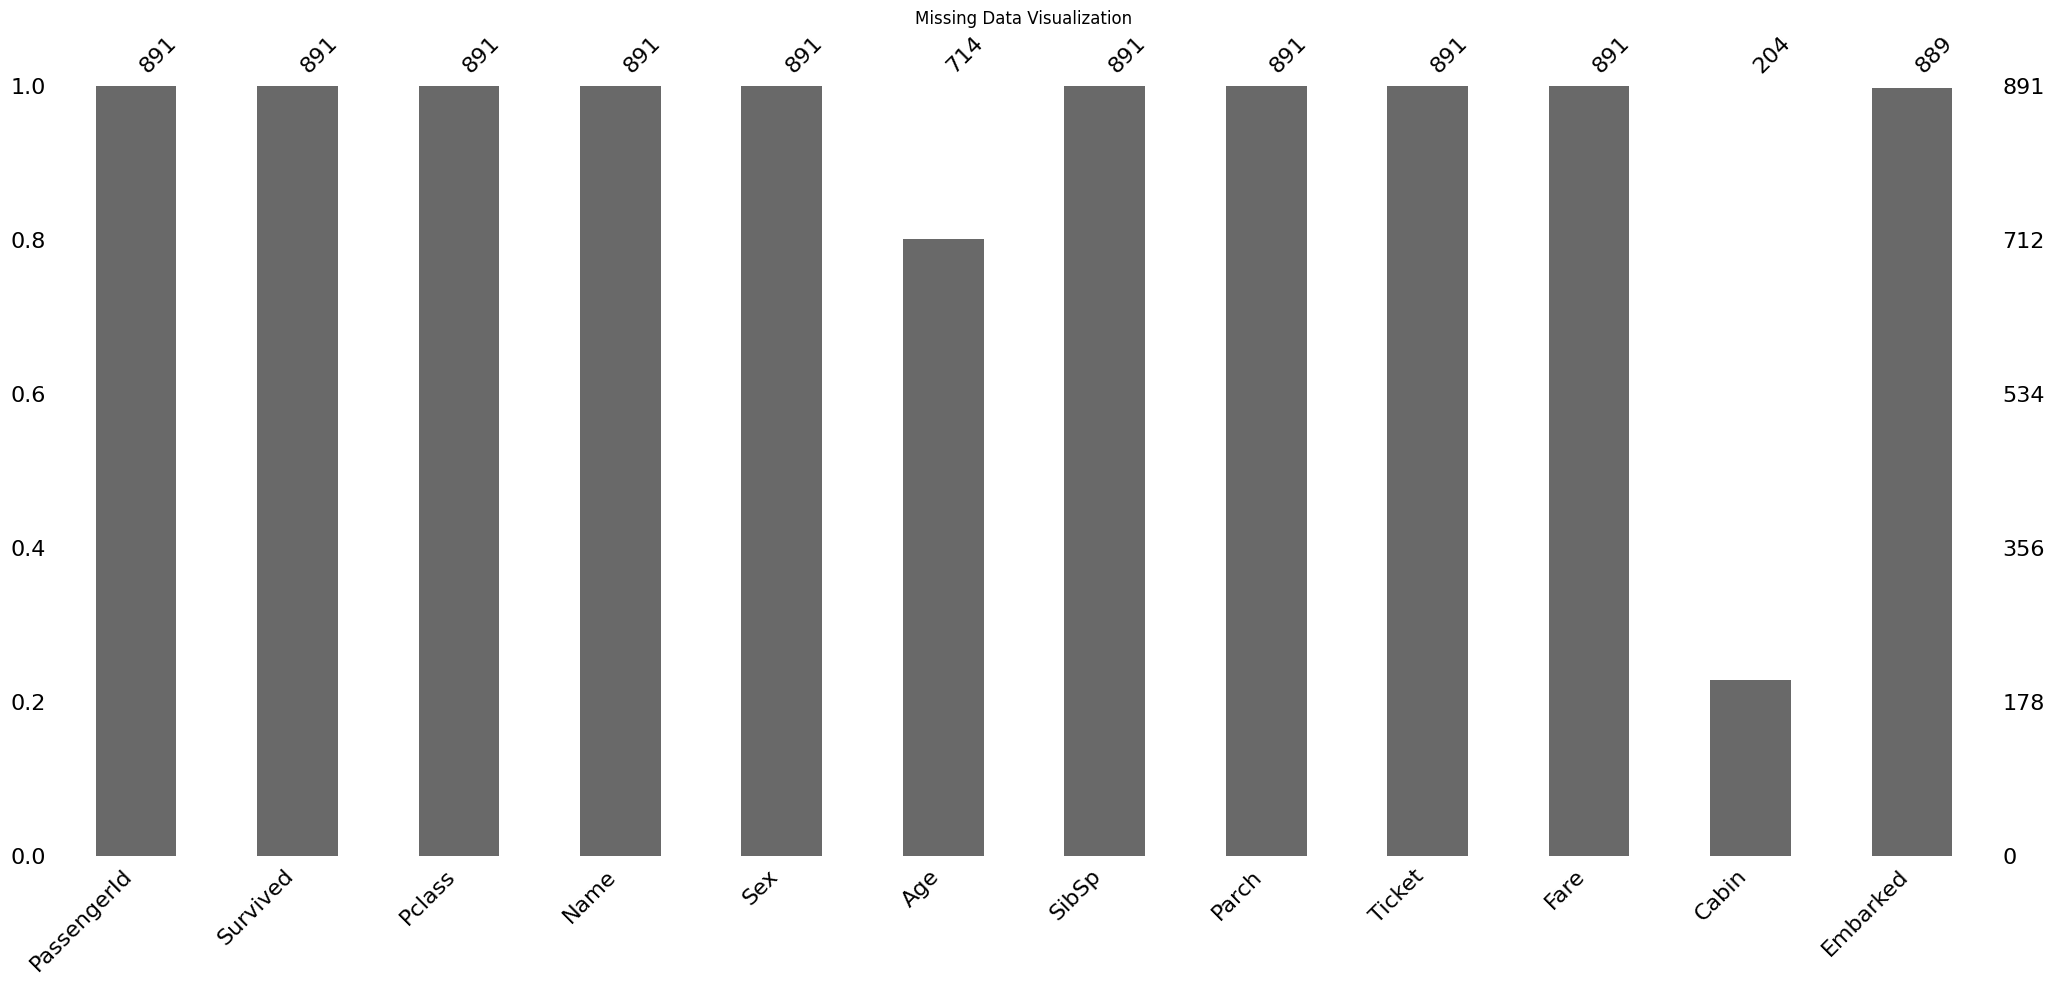

In [7]:
# Visualize missing data
import missingno as msno
msno.bar(df)
plt.title('Missing Data Visualization')
plt.show()

In [8]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

<ipython-input-8-c1f5f6fe4b25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
#Create a binary feature indicating if Cabin is known and drop Cabin column
df['Cabin_known'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [10]:
# Fill missing Embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-10-3b73cfcb5660>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


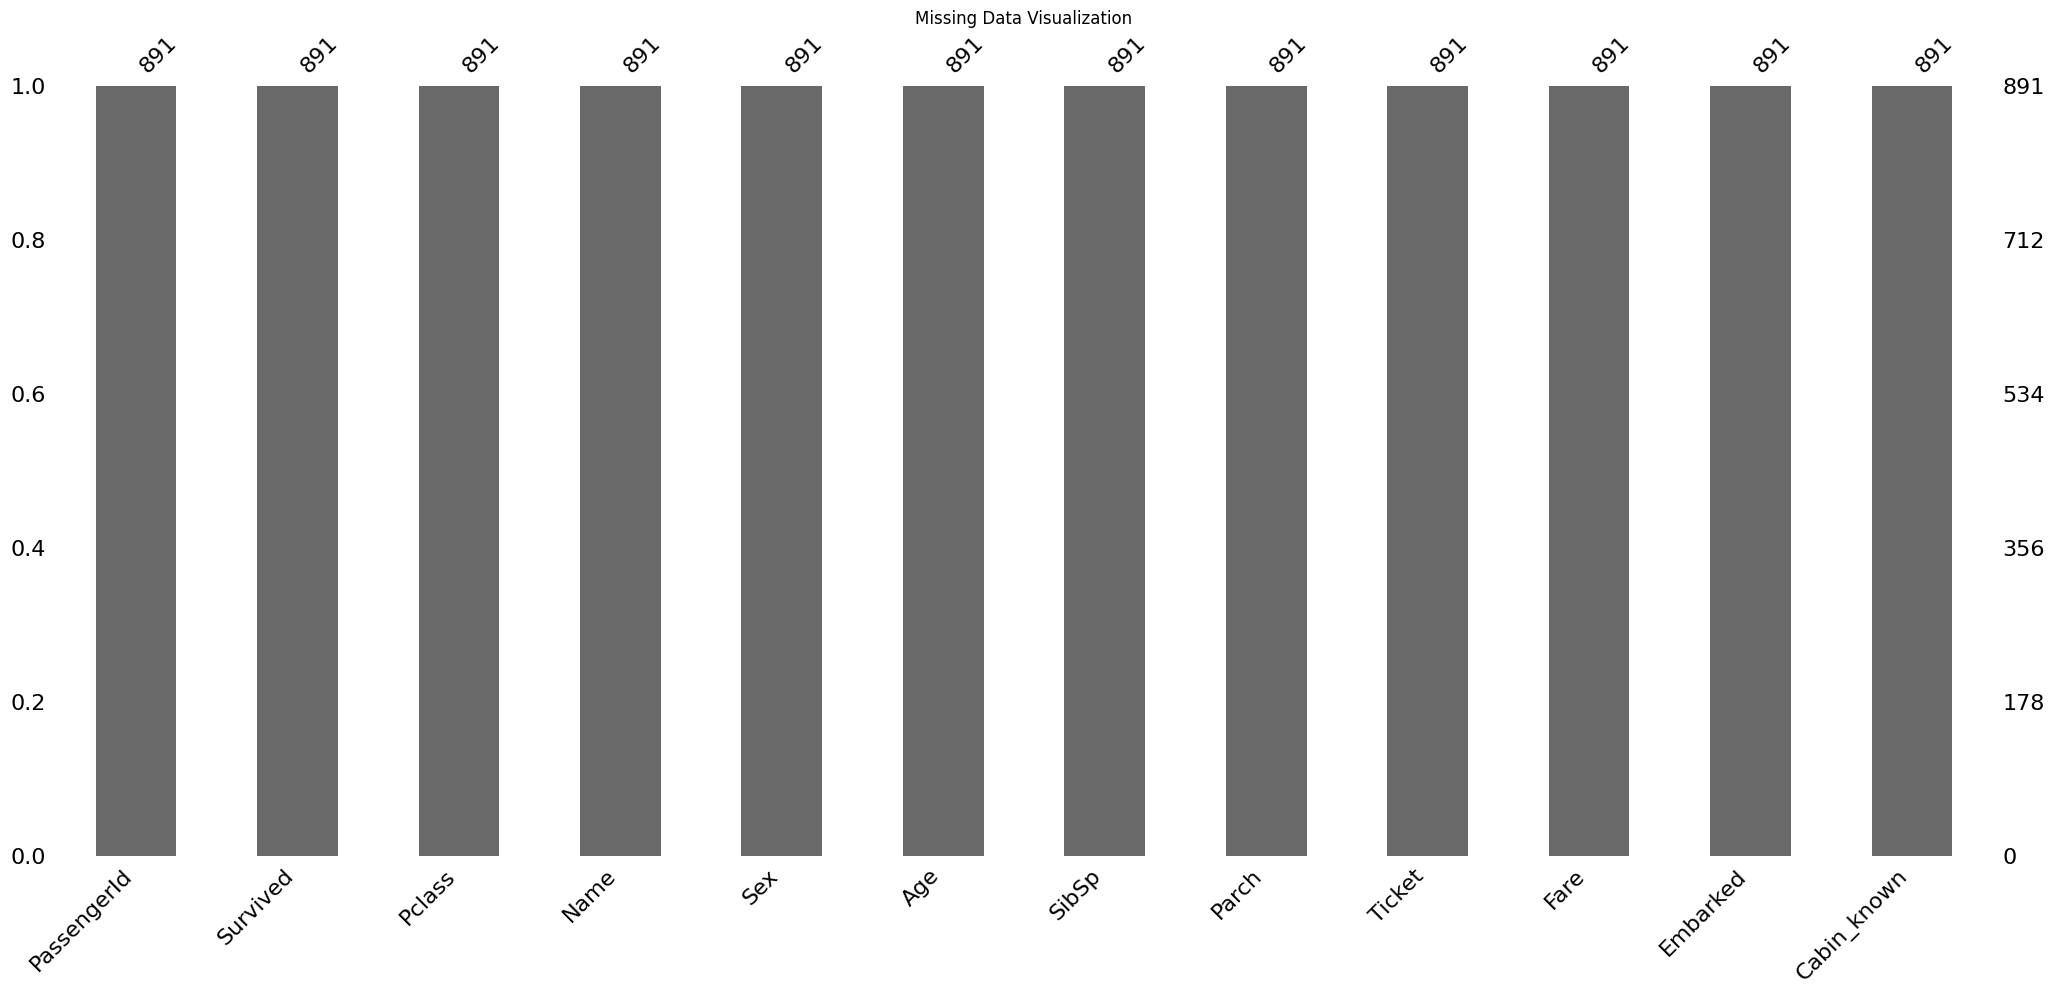

In [11]:
# Visualize missing data
msno.bar(df)
plt.title('Missing Data Visualization')
plt.show()

## 3. Feature Engineering

Goal: Enhance the dataset by creating new features for better insights.

Steps:
* Create a new feature Family Size by combining SibSp (siblings/spouses aboard) and Parch (parents/children aboard).
* Categorize Age into logical bins (Child, Teen, Adult, Senior).
* Group Fare into quartiles for easier analysis.

In [12]:
# Create a new feature for Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [13]:
# Categorize Age into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 50, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Adult


In [14]:
# Create Fare Bands
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,FamilySize,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Adult,Medium


## 4. **Visualization**

Goal: Analyze survival patterns based on demographic and ticket class features.

Steps:
  * Use visualizations to analyze survival rates by Pclass, Sex, Age, Fare and Embarked.
  * Generate histograms or KDE plots for numerical features like Age and Fare.
  * Use a bar plot to examine survival rates by categorical features.

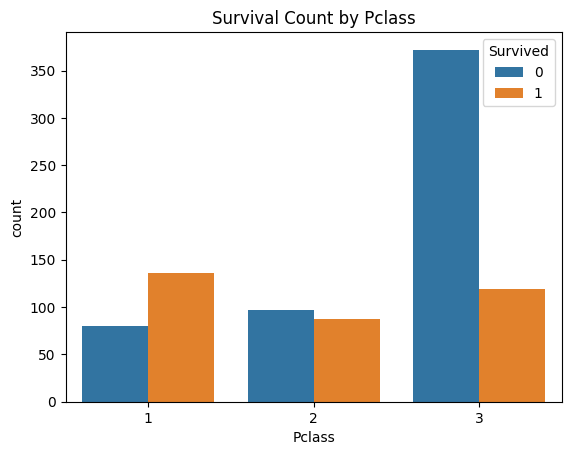

In [15]:
# Visualize survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

In [16]:
#Survival chance by age
df.groupby('AgeGroup')['Survived'].value_counts(normalize=True)

<ipython-input-16-5925d88abf32>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].value_counts(normalize=True)


AgeGroup  Survived
Child     1           0.579710
          0           0.420290
Teen      0           0.571429
          1           0.428571
Adult     0           0.636628
          1           0.363372
Senior    0           0.656250
          1           0.343750
Name: proportion, dtype: float64

<ipython-input-17-af845ee4fd34>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], shade=True, label='Survived')
<ipython-input-17-af845ee4fd34>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], shade=True, label='Not Survived')


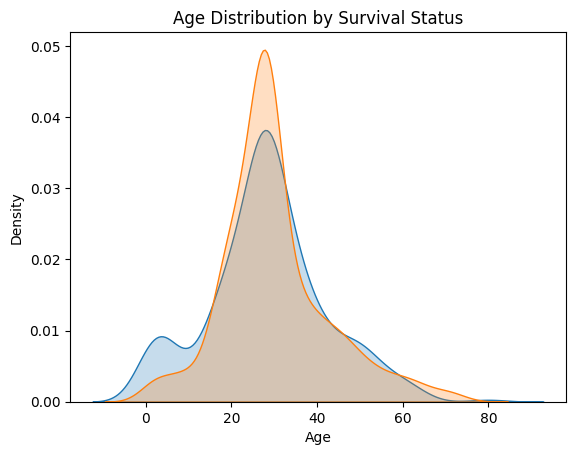

In [17]:
# KDE plot for Age distribution by survival
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], shade=True, label='Survived')
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], shade=True, label='Not Survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.show()

In [18]:
#Percentage of men vs women survival
df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

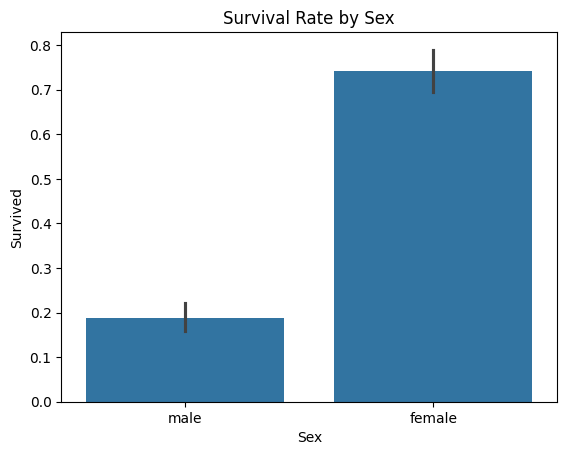

In [19]:
# Bar plot for survival by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

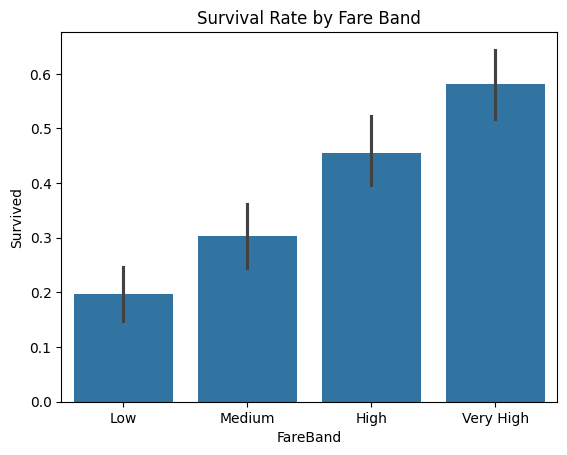

In [20]:
# Survival by Fare Band
sns.barplot(x='FareBand', y='Survived', data=df)
plt.title('Survival Rate by Fare Band')
plt.show()

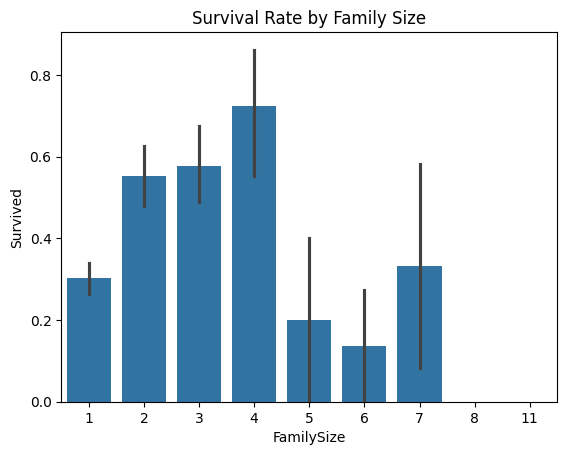

In [21]:
# Survival by Family Size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

## 5. Feature Standardization and Normalization

* Goal: Prepare numerical features by scaling them to facilitate further modeling.
* Steps:
  * Standardize numerical features like Age and Fare to mean zero and unit variance.
  * Use StandardScaler for scaling.

In [22]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [23]:
from sklearn.preprocessing import StandardScaler

# Standardize Age and Fare
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


## 6. Correlation Analysis

* Goal: Identify correlations among features and between features and survival status.
* Steps:
  * Use a heatmap to display the correlation matrix.
  * Analyze which features show strong correlations with Survived.

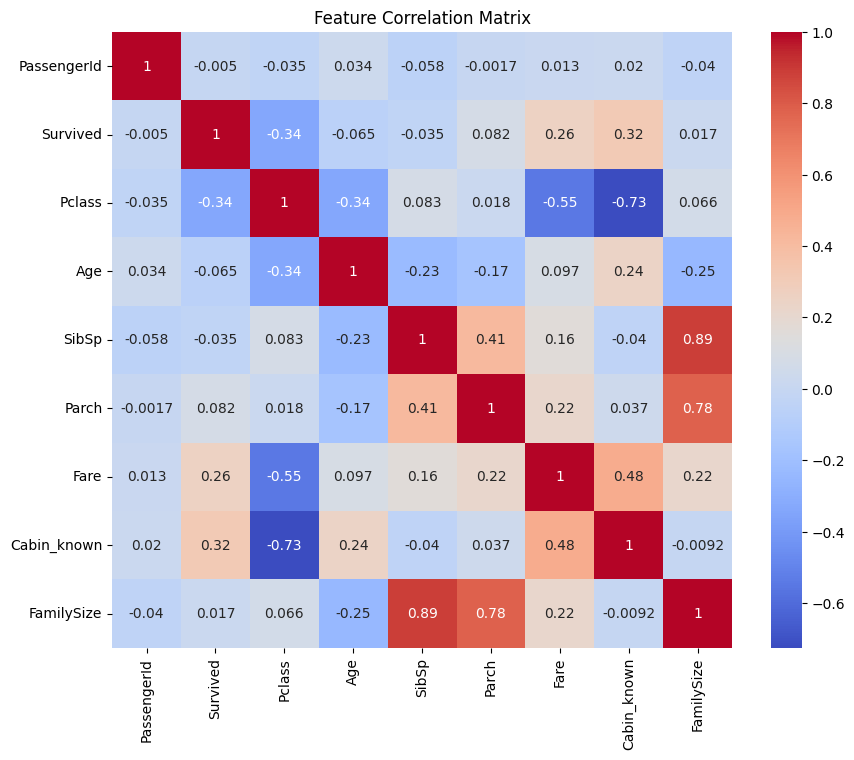

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


## 7. Summary

In this analysis, we explored survival patterns among Titanic passengers and performed necessary data cleaning. Key insights include:
- Higher survival rates for women and first-class passengers.
- Survial rate and fare, family size, gender
- Strong correlation between passenger class and survival.

In our analysis, we found that women had higher survial chance in comparision to men, 74% chance for women in comparison to 18% for men.

57% of the children survived.

First class passengers had higher chance of survival than other class. High fare also correlated with survival.

There was strong correlation between class and fare.